# Generative AI: generating cartoons from text using NLP and image processing



The tentative workflow for text to cartoon generative project is as follows:

1) Collect and preprocess data: Gather a dataset of cartoons and their corresponding descriptions or captions. I have scraped online to gather a vast amount of cartoons. Image downloader youtube plugin was used to collect the data. The cartoons collected as such had their file name as the key and hence not much cleaning was necessary. 

2) Train an NLP model: There are multiple ways to deal with the text recognition. for example, we can take advantage of a pre-trained language model or train our own using a deep learning framework like TensorFlow or PyTorch. In this project we will be first try a pre-attention simple NLP model. Next we'll be using pre-trained models such as GPT or BARD using their API. 

3) Train a computer vision model: Again multiple ways to do it such as using a pre-trained image recognition model like VGG or Inception, or train our own model if we have a large labeled dataset. For this project we'll try a pre-trained model from Huggingface.

4) Design an architecture that combines the textual and visual information.

5) Evaluate and refine:



In [1]:
import os

# Assuming your images are stored in a directory
image_directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'

# Get the list of image file names
image_files = os.listdir(image_directory)

# Extract the labels from the file names
labels = [file.split('.')[0] for file in image_files]

# Print the labels
print(labels)

['0-all-enterocytes-atrophied', '0-all-enterocytes-damaged', '0-all-enterocytes-flattened', '0-all-enterocytes-normal', '0-glycan-example-a', '0-glycan-example-b', '0-glycan-example-c', '0-glycan-example-d', '0-glycan-example-e', '0-intestinal-cells-specialized-1-02', '01-hydrogen', '02-helium', '03-lithium', '04-beryllium', '05-boron', '06-carbon', '07-nitrogen', '08-oxygen', '09-fluorine', '10-ml-bioreactor-tube-with-cap', '11-sodium', '15-phosphorus', '16-sulfur', '17-chlorine', '19-potassium', '1de-blot', '2-liquid-closed', '2-liquid-open', '20-ml-bioreactor-tube-with-cap', '22-titanium', '26-iron', '3-liquid-closed-rainbow', '30-ml-bioreactor-tube-with-cap', '35-bromine', '3d-cylinder', '3d-dodecahedron', '3d-icosahedron', '3d-octahedron', '3d-printed-microfluidic-device', '3d-tetrahedron', '4-liquid-closed', '4-liquid-open', '40ml-bioreactor-tube-with-cap', '5-carboxylcytosine', '5-formylcytosine', '5-hydroxymethylcytosine', '5-methylcytosine-with-ribose-01', '5-methylcytosine', 

In [2]:
import os
from PIL import Image

# Directory containing the images
image_directory = r"C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images"

# List to store image-label associations
image_label_mapping = {}

# Iterate over the image files in the directory
for file_name in os.listdir(image_directory):
    # Construct the file path for the current image
    image_path = os.path.join(image_directory, file_name)
    
    # Open the image using a suitable library like Pillow (PIL)
    image = Image.open(image_path)
    
    # Associate the image path with the file name (label) in the mapping dictionary
    image_label_mapping[file_name] = image

# Accessing an image based on its label
#label = 'antisense-oligonucleotide-with-mrna.png'
#image = image_label_mapping[label]
# Now you can use the 'image' variable for further processing or display

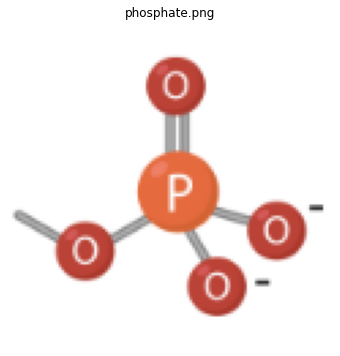

In [3]:
import matplotlib.pyplot as plt

# Accessing an image based on its label
label = 'phosphate.png'
image = image_label_mapping[label]

# Display the image and its label
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title(label)
plt.axis('off')
plt.show()

In [4]:
pip install nltk

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aubhi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
text = word_tokenize("phosphate is transferred from ATP to glucose")
nltk.pos_tag(text)

[('phosphate', 'NN'),
 ('is', 'VBZ'),
 ('transferred', 'VBN'),
 ('from', 'IN'),
 ('ATP', 'NNP'),
 ('to', 'TO'),
 ('glucose', 'VB')]

In [8]:
from nltk import pos_tag
# Tokenize the text into sentences and words
sentences = sent_tokenize("phosphate is transferred from ATP to glucose")
words = [word_tokenize(sent) for sent in sentences]

# Tag the words with part-of-speech
tagged_words = [pos_tag(sent) for sent in words]

In [9]:
nouns = [word for sentence in tagged_words for (word, tag) in sentence if tag.startswith('NN')]
verbs = [word for sentence in tagged_words for (word, tag) in sentence if tag.startswith('VBN')]

In [10]:
nouns

['phosphate', 'ATP']

In [11]:
verbs

['transferred']

In [12]:
suffix = '.png'

nouns_mod = [item + suffix for item in nouns]
verbs_mod = [item + suffix for item in verbs]

In [13]:
nouns_mod

['phosphate.png', 'ATP.png']

In [14]:
verbs_mod

['transferred.png']

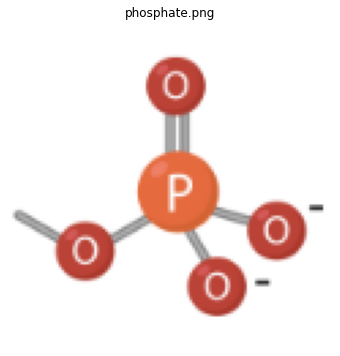

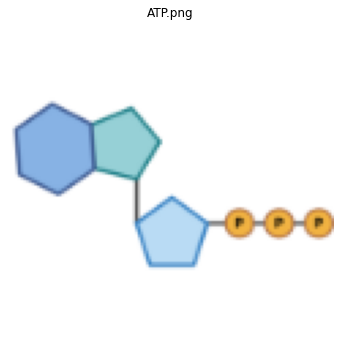

In [15]:
# Display the image and its label
for noun in nouns_mod:
    label_POS = noun
    image_POS = image_label_mapping[label_POS]
    plt.figure(figsize=(8, 6))
    plt.imshow(image_POS)
    plt.title(label_POS)
    plt.axis('off')
    plt.show()

In [16]:
import tkinter as tk
from PIL import ImageTk, Image
import os

# List of labels for the items= nouns_mod
image_names = ['phosphate.png', 'ATP.png']


# List of image paths corresponding to the labels
#image_paths = [image_label_mapping[label] for label in labels] (wrote by ChatGPT)


# Create the Tkinter window
#window = tk.Tk() chatgpt wrote it
window = tk.Toplevel() 
# from stack overflow: https://stackoverflow.com/questions/20251161/tkinter-tclerror-image-pyimage3-doesnt-exist/20259317
window.title("Item Animation")

# Create a canvas to display the images
canvas = tk.Canvas(window, width=400, height=400)
canvas.pack()

# Load the images and display them sequentially
image_objects = []
for image_name in image_names:
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects.append(image)
    # Attach image to a canvas item to prevent garbage collection
    #canvas.image = image
    
    
def animate_images(index):
    canvas.delete("all")  # Clear the canvas
    canvas.create_image(200, 200, image=image_objects[index])  # Display the current image
    canvas.after(2000, animate_images, (index + 1) % len(image_objects))  # Repeat after a delay

# Start the animation
animate_images(0)

# Run the Tkinter event loop
window.mainloop()

In [17]:
# how to show the cartoons side by side instead of one after another
import tkinter as tk
from PIL import ImageTk, Image
import os

# List of image names
image_names = ['phosphate.png', 'ATP.png']

# Create the Tkinter window
window_2 = tk.Toplevel()
window_2.title("Item Animation")

# Create a canvas to display the images
canvas_2 = tk.Canvas(window_2, width=800, height=400)
canvas_2.pack()

# Load the images and display them side by side
image_objects_2 = []
image_x_positions = [200, 800]  # X positions for the images
for i, image_name in enumerate(image_names):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_2.append(image)
    canvas_2.create_image(image_x_positions[i], 200, image=image)  # Display the image

# Run the Tkinter event loop
window_2.mainloop()

In [18]:
#3 images in the canvas
import tkinter as tk
from PIL import ImageTk, Image
import os

# List of image names
image_names_3 = ['ATP.png', 'curving-arrow-thick-tapered-editable-6.png', 'phosphate.png']

# Create the Tkinter window
window_3 = tk.Toplevel()
window_3.title("Item Animation")

# Create a canvas to display the images
canvas_3 = tk.Canvas(window_3, width=800, height=400)
canvas_3.pack()

# Load the images and display them side by side
image_objects_3 = []
image_x_positions = [200, 400, 600]  # X positions for the images

for i, image_name in enumerate(image_names_3):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_3.append(image)
    canvas_3.create_image(image_x_positions[i], 200, image=image)  # Display the image

''''path in image_directory:
    image = Image.open(path)
    image = image.resize((190, 190))
    images_2.append(ImageTk.PhotoImage(image))'''

# Create image items on the canvas in a grid layout
'''for i in range(2):
    for j in range(2):
        image_item = canvas_3.create_image((j * 200) + 100, (i * 200) + 100, image=image_objects_3[(i * 3) + j])'''
        
# Update the canvas to display the items
canvas_3.update()

# Run the Tkinter event loop to display the window
window_3.mainloop()

In [19]:
#3 images in the canvas
import tkinter as tk
from PIL import ImageTk, Image
import os

# List of image names
image_names_noun = nouns_mod
image_names_verb = ['curving-arrow-thick-tapered-editable-6.png']

# Create the Tkinter window
window_3 = tk.Toplevel()
window_3.title("Item Animation")

# Create a canvas to display the images
canvas_3 = tk.Canvas(window_3, width=800, height=400)
canvas_3.pack()

# Load the images and display them side by side
image_objects_3 = []
image_x_positions = [200, 600]  # X positions for the images

for i, image_name in enumerate(image_names_noun):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_3.append(image)
    canvas_3.create_image(image_x_positions[i], 200, image=image)  # Display the image
    
for j, image_name in enumerate(image_names_verb):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_3.append(image)
    canvas_3.create_image(400, 200, anchor= 'center', image=image)  # Display the image

''''path in image_directory:
    image = Image.open(path)
    image = image.resize((190, 190))
    images_2.append(ImageTk.PhotoImage(image))'''

# Create image items on the canvas in a grid layout
'''for i in range(2):
    for j in range(2):
        image_item = canvas_3.create_image((j * 200) + 100, (i * 200) + 100, image=image_objects_3[(i * 3) + j])'''
        
# Update the canvas to display the items
canvas_3.update()

# Run the Tkinter event loop to display the window
window_3.mainloop()

In [20]:
input_1 = input('Step1?\n')     # \n ---> newline  ---> It causes a line break

Step1?
Phosphate from ATP


In [21]:
#text_input = word_tokenize(input_1)
#nltk.pos_tag(text_input)

# Tokenize the text into sentences and words
sentences_input = sent_tokenize(input_1)
words_input = [word_tokenize(sent) for sent in sentences_input]

# Tag the words with part-of-speech
tagged_words_input = [pos_tag(sent) for sent in words]

nouns_input = [word for sentences in tagged_words_input for (word, tag) in sentences if tag.startswith('NN')]
verbs_input = [word for sentences in tagged_words_input for (word, tag) in sentences if tag.startswith('VBN')]

suffix = '.png'

nouns_input_mod = [item + suffix for item in nouns_input]
verbs_input_mod = [item + suffix for item in verbs_input]

print(nouns_input_mod, verbs_input_mod)

#3 images in the canvas
import tkinter as tk
from PIL import ImageTk, Image
import os

# List of image names
image_names_noun_input = nouns_input_mod
image_names_verb_input = ['curving-arrow-thick-tapered-editable-6.png']

# Create the Tkinter window
window_input = tk.Toplevel()
window_input.title("Item Animation")

# Create a canvas to display the images
canvas_input = tk.Canvas(window_input, width=800, height=400)
canvas_input.pack()

# Load the images and display them side by side
image_objects_input = []
image_x_positions = [200, 600]  # X positions for the images

for i, image_name in enumerate(image_names_noun_input):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_input.append(image)
    canvas_input.create_image(image_x_positions[i], 200, image=image)  # Display the image
    
for j, image_name in enumerate(image_names_verb):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_input.append(image)
    canvas_input.create_image(400, 200, anchor= 'center', image=image)  # Display the image
        
# Update the canvas to display the items
canvas_input.update()

# Run the Tkinter event loop to display the window
window_input.mainloop()

['phosphate.png', 'ATP.png'] ['transferred.png']


### Use of synonym, instead of exact match from wordnet to generate the cartoon using wordnet

In [26]:
import tkinter as tk
from PIL import ImageTk, Image
import os
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')

# Create a Tkinter window
window = tk.Tk()

# Function to check if a file name matches the input text
def is_exact_match(input_text, file_name):
    file_name_without_extension = os.path.splitext(file_name)[0]  # Remove the file extension
    file_name_without_extension = file_name_without_extension.lower()  # Convert to lowercase for matching
    return input_text == file_name_without_extension

# Function to get synonyms for a given word using WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to find the image path based on the input text
def find_image_path(input_text, directory):
    file_names = os.listdir(directory)
    
    # Check for exact matches
    for file_name in file_names:
        if is_exact_match(input_text, file_name):
            return os.path.join(directory, file_name)

    # Check for synonyms using WordNet
    synonyms = get_synonyms(input_text)
    for file_name in file_names:
        if is_exact_match(file_name, input_text) or any(is_exact_match(synonym, file_name) for synonym in synonyms):
            return os.path.join(directory, file_name)

    return None

# Function to display the cartoon image based on the user's input
def display_cartoon():
    input_text = entry.get()
    input_text = input_text.lower()  # Convert the input text to lowercase for matching

    directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'  # Replace with your image directory path

    # Find the image path based on the input text
    image_path = find_image_path(input_text, directory)

    # Display the image if found
    if image_path:
        image = Image.open(image_path)
        image = image.resize((200, 200))  # Adjust the size as needed
        image_tk = ImageTk.PhotoImage(image)
        canvas.create_image(200, 200, image=image_tk)
        canvas.image = image_tk  # Store a reference to avoid garbage collection
    else:
        # Display a default image or show an error message
        pass

# Create a canvas to display the image
canvas = tk.Canvas(window, width=400, height=400)
canvas.pack()

# Create an entry widget for the user to input text
entry = tk.Entry(window)
entry.pack()

# Create a button to trigger the display of the cartoon image
button = tk.Button(window, text="Display", command=display_cartoon)
button.pack()

# Run the Tkinter event loop
window.mainloop()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aubhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import tkinter as tk
from PIL import ImageTk, Image
import os
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')

# Create a Tkinter window
window = tk.Tk()

# Function to check if a file name matches the input text
def is_exact_match(input_text, file_name):
    file_name_without_extension = os.path.splitext(file_name)[0]  # Remove the file extension
    file_name_without_extension = file_name_without_extension.lower()  # Convert to lowercase for matching
    return input_text == file_name_without_extension

# Function to get synonyms for a given word using WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to find the image path based on the input text
def find_image_path(input_text, directory):
    file_names = os.listdir(directory)
    
    # Check for exact matches
    for file_name in file_names:
        if is_exact_match(input_text, file_name):
            return os.path.join(directory, file_name)

    # Check for synonyms using WordNet
    synonyms = get_synonyms(input_text)
    for file_name in file_names:
        if is_exact_match(file_name, input_text) or any(is_exact_match(synonym, file_name) for synonym in synonyms):
            return os.path.join(directory, file_name)

    return None

# Function to display the cartoon image based on the user's input
def display_cartoon():
    input_text = entry.get()
    input_text = input_text.lower()  # Convert the input text to lowercase for matching

    directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'  # Replace with your image directory path

    # Find the image path based on the input text
    image_path = find_image_path(input_text, directory)

    # Display the image if found
    if image_path:
        image = Image.open(image_path)
        image = image.resize((200, 200))  # Adjust the size as needed
        image_tk = ImageTk.PhotoImage(image)
        canvas.create_image(200, 200, image=image_tk)
        canvas.image = image_tk  # Store a reference to avoid garbage collection
    else:
        # Display a default image or show an error message
        pass

# Create a canvas to display the image
canvas = tk.Canvas(window, width=400, height=400)
canvas.pack()

# Create an entry widget for the user to input text
entry = tk.Entry(window)
entry.pack()

# Create a button to trigger the display of the cartoon image
button = tk.Button(window, text="Display", command=display_cartoon)
button.pack()

# Run the Tkinter event loop
window.mainloop()

# Load the images and display them side by side
image_objects_input = []
image_x_positions = [200, 600]  # X positions for the images

for i, image_name in enumerate(image_names_noun_input):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_input.append(image)
    canvas_input.create_image(image_x_positions[i], 200, image=image)  # Display the image
    
for j, image_name in enumerate(image_names_verb):
    image_path = os.path.join(image_directory, image_name)
    image = ImageTk.PhotoImage(Image.open(image_path))
    image_objects_input.append(image)
    canvas_input.create_image(400, 200, anchor= 'center', image=image)  # Display the image
        
# Update the canvas to display the items
canvas_input.update()

# Run the Tkinter event loop to display the window
window_input.mainloop()

Side by side cartoons: The arrows need to be defined based on from or to

In [28]:
import tkinter as tk
from PIL import ImageTk, Image
import os
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')

# Create a Tkinter window
window = tk.Tk()

# Function to check if a file name matches the input text
def is_exact_match(input_text, file_name):
    file_name_without_extension = os.path.splitext(file_name)[0]  # Remove the file extension
    file_name_without_extension = file_name_without_extension.lower()  # Convert to lowercase for matching
    return input_text == file_name_without_extension

# Function to get synonyms for a given word using WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to find the image path based on the input text
def find_image_path(input_text, directory):
    file_names = os.listdir(directory)

    # Check for exact matches
    for file_name in file_names:
        if is_exact_match(input_text, file_name):
            return os.path.join(directory, file_name)

    # Check for synonyms using WordNet
    synonyms = get_synonyms(input_text)
    for file_name in file_names:
        if is_exact_match(file_name, input_text) or any(is_exact_match(synonym, file_name) for synonym in synonyms):
            return os.path.join(directory, file_name)

    return None

# Function to display the cartoon images based on the user's input
def display_cartoon():
    input_text = entry.get()
    input_text = input_text.lower()  # Convert the input text to lowercase for matching

    directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'  # Replace with your image directory path

    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(input_text)

    # Clear the frame before displaying the new images
    for widget in frame.winfo_children():
        widget.destroy()

    # Iterate through each word and display the corresponding cartoon image
    x = 0  # Initial x-coordinate for image display
    for word in tokens:
        # Find the image path based on the current word
        image_path = find_image_path(word, directory)

        # Display the image if found
        if image_path:
            image = Image.open(image_path)
            image = image.resize((100, 100))  # Adjust the size as needed
            image_tk = ImageTk.PhotoImage(image)
            label = tk.Label(frame, image=image_tk)
            label.image = image_tk  # Store a reference to avoid garbage collection
            label.pack(side="left", padx=10)
            x += 1

# Create a frame to display the cartoon images
frame = tk.Frame(window)
frame.pack()

# Create an entry widget for the user to input text
entry = tk.Entry(window)
entry.pack()

# Create a button to trigger the display of the cartoon images
button = tk.Button(window, text="Display", command=display_cartoon)
button.pack()

# Run the Tkinter event loop
window.mainloop()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aubhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Soft match with the figure name

In [30]:
import tkinter as tk
from PIL import ImageTk, Image
import os
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')

# Create a Tkinter window
window = tk.Tk()

# Function to check if a file name matches the input text
def is_exact_match(input_text, file_name):
    file_name_without_extension = os.path.splitext(file_name)[0]  # Remove the file extension
    file_name_without_extension = file_name_without_extension.lower()  # Convert to lowercase for matching
    return input_text in file_name_without_extension # in instead of ==

# Function to get synonyms for a given word using WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to find the image path based on the input text
def find_image_path(input_text, directory):
    file_names = os.listdir(directory)

    # Check for exact matches
    for file_name in file_names:
        if is_exact_match(input_text, file_name):
            return os.path.join(directory, file_name)

    # Check for synonyms using WordNet
    synonyms = get_synonyms(input_text)
    for file_name in file_names:
        if is_exact_match(file_name, input_text) or any(is_exact_match(synonym, file_name) for synonym in synonyms):
            return os.path.join(directory, file_name)

    return None

# Function to display the cartoon images based on the user's input
def display_cartoon():
    input_text = entry.get()
    input_text = input_text.lower()  # Convert the input text to lowercase for matching

    directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'  # Replace with your image directory path

    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(input_text)

    # Clear the frame before displaying the new images
    for widget in frame.winfo_children():
        widget.destroy()

    # Iterate through each word and display the corresponding cartoon image
    x = 0  # Initial x-coordinate for image display
    for word in tokens:
        # Find the image path based on the current word
        image_path = find_image_path(word, directory)

        # Display the image if found
        if image_path:
            image = Image.open(image_path)
            image = image.resize((100, 100))  # Adjust the size as needed
            image_tk = ImageTk.PhotoImage(image)
            label = tk.Label(frame, image=image_tk)
            label.image = image_tk  # Store a reference to avoid garbage collection
            label.pack(side="left", padx=10)
            x += 1

# Create a frame to display the cartoon images
frame = tk.Frame(window)
frame.pack()

# Create an entry widget for the user to input text
entry = tk.Entry(window)
entry.pack()

# Create a button to trigger the display of the cartoon images
button = tk.Button(window, text="Display", command=display_cartoon)
button.pack()

# Run the Tkinter event loop
window.mainloop()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aubhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Priority based: exact match first priority and then 'in'

In [39]:
import tkinter as tk
from PIL import ImageTk, Image
import os
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')

# Create a Tkinter window
window = tk.Tk()

# Function to check if a file name matches the input text
def is_exact_match(input_text, file_name):
    file_name_without_extension = os.path.splitext(file_name)[0]  # Remove the file extension
    file_name_without_extension = file_name_without_extension.lower()  # Convert to lowercase for matching
    return input_text in file_name_without_extension # in instead of ==

# Function to get synonyms for a given word using WordNet
def get_synonyms(word):
    synonyms = []
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to find the image path based on the input text
from nltk.corpus import wordnet

def find_image_path(input_text, directory):
    file_names = os.listdir(directory)

    # First round: Exact matches
    exact_matches = []
    partial_matches = []

    for file_name in file_names:
        # Remove the file extension
        file_name_without_extension = os.path.splitext(file_name)[0]
        file_name_without_extension = file_name_without_extension.lower()

        # Check for exact matches
        if input_text == file_name_without_extension:
            exact_matches.append(file_name)
        # Check for partial matches
        elif input_text in file_name_without_extension:
            partial_matches.append(file_name)

    # Check exact matches
    if exact_matches:
        return os.path.join(directory, exact_matches[0])  # Return the first exact match

    # Check partial matches if no exact match is found
    if partial_matches:
        return os.path.join(directory, partial_matches[0])  # Return the first partial match

    # Third round: WordNet synonyms
    synonyms = wordnet.synsets(input_text)
    for synset in synonyms:
        for lemma in synset.lemmas():
            lemma_name = lemma.name().lower()
            for file_name in file_names:
                if lemma_name in file_name.lower():
                    return os.path.join(directory, file_name)

    return None

# Function to display the cartoon images based on the user's input
def display_cartoon():
    input_text = entry.get()
    input_text = input_text.lower()  # Convert the input text to lowercase for matching

    directory = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Biorender\All_images'  # Replace with your image directory path

    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(input_text)

    # Clear the frame before displaying the new images
    for widget in frame.winfo_children():
        widget.destroy()

    # Iterate through each word and display the corresponding cartoon image
    x = 0  # Initial x-coordinate for image display
    for word in tokens:
        # Find the image path based on the current word
        image_path = find_image_path(word, directory)

        # Display the image if found
        if image_path:
            image = Image.open(image_path)
            image = image.resize((100, 100))  # Adjust the size as needed
            image_tk = ImageTk.PhotoImage(image)
            label = tk.Label(frame, image=image_tk)
            label.image = image_tk  # Store a reference to avoid garbage collection
            label.pack(side="left", padx=10)
            x += 1

# Create a frame to display the cartoon images
frame = tk.Frame(window)
frame.pack()

# Create an entry widget for the user to input text
entry = tk.Entry(window)
entry.pack()

# Create a button to trigger the display of the cartoon images
button = tk.Button(window, text="Display", command=display_cartoon)
button.pack()

# Run the Tkinter event loop
window.mainloop()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aubhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Using BARD API for generating meaning from the text input and searching for images from the library